In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
import numpy as np

In [9]:
#Import crime data
filepath = r'Resources\UCR76_17.csv'
crime_df = pd.read_csv(filepath)
crime_df.head()

,ORI,Name,YEAR,MRD,CLR,State,County,Agency
0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage
1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage
2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage
3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage
4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage


In [10]:
#Import income data (2017)
filepath1 = r'Resources\kaggle_income2.xlsx'
income_df = pd.read_excel(filepath1)
#view income data
income_df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [11]:
#filter crime data for year 2017 to match the income data
crime_df = crime_df.loc[crime_df['YEAR']==2017]

In [13]:
#Split of the state abbreviation from each of the counties on the crime dataframe
crime_df['County1'] = crime_df['County'].str.split(',').str[0]

In [14]:
# Add county to the end of each county entry in the crime dataframe to match the format of the income dataframe
crime_df['County'] = crime_df['County1'] + " " + 'County'

In [29]:
#Pivot on County and sum the murders to get the total amount of murders for the whole county
crime_df2 = crime_df.groupby(['County','State']).sum()['MRD']
crime_df2

County              State         
Abbeville County    South Carolina     1
Acadia County       Louisiana          7
Accomack County     Virginia           3
Ada County          Idaho              3
Adair County        Kentucky           2
                    Missouri           1
                    Oklahoma           1
Adams County        Colorado          21
                    Nebraska           1
                    Ohio               2
                    Pennsylvania       1
                    Washington         1
Addison County      Vermont            1
Aiken County        South Carolina    12
Alachua County      Florida            9
Alamance County     North Carolina     4
Alameda County      California        90
Albany County       New York           8
                    Wyoming            1
Albemarle County    Virginia           5
Alexander County    North Carolina     1
Alexandria County   Virginia           6
Alfalfa County      Oklahoma           1
Alger County        Mi

In [47]:
income_df = income_df.rename(columns={'State_Name': 'State'})

In [48]:
income_df2 = income_df.groupby(['County','State']).mean()['Mean']

In [49]:
print(len(income_df2))
print(len(crime_df2))

1678
1533


In [53]:
combined_df2 = pd.merge(crime_df2, income_df2, left_index=True, right_index=True)
combined_df2

MRD           Mean
County             State                             
Abbeville County   South Carolina    1   56507.667464
Accomack County    Virginia          3   79689.473973
Ada County         Idaho             3   57745.826772
Adair County       Kentucky          2   55499.625000
                   Missouri          1   58124.035533
                   Oklahoma          1   56677.839109
Adams County       Colorado         21   73878.751046
                   Nebraska          1   63907.714286
                   Ohio              2   59663.274590
                   Pennsylvania      1   65437.888376
                   Washington        1   75007.032000
Addison County     Vermont           1   64556.183099
Aiken County       South Carolina   12   40744.500000
Alachua County     Florida           9   60866.638393
Alamance County    North Carolina    4   58429.636798
Alameda County     California       90   78596.131394
Albany County      New York          8   76173.186856
                   Wyoming           1   71245.418182
Albemarle County   Virginia          5   45772.000000
Alfalfa County     Oklahoma          1   55944.000000
Allegany County    Maryland          2   87322.147114
                   New York          2   53906.750000
Allegheny County   Pennsylvania     96   70288.333333
Allen County       Indiana          39   44825.000000
                   Kansas            1   63857.405063
                   Ohio              6   71663.000000
Alpena County      Michigan          2   41780.000000
Amelia County      Virginia          1   34802.000000
Anderson County    South Carolina   10   43460.166667
                   Tennessee         5   56549.791815
...                                ...            ...
Wicomico County    Maryland          9   57878.000000
Wilkes County      North Carolina    1   42602.500000
Will County        Illinois         25   56254.000000
Willacy County     Texas             1   49236.000000
Williams County    North Dakota      1   91570.000000
Williamson County  Illinois          1   44915.000000
                   Tennessee         3  111205.000000
                   Texas             2   69131.500000
Wilson County      North Carolina   10   56454.000000
                   Tennessee         4   82891.000000
Windham County     Vermont           1   44911.000000
Windsor County     Vermont           1   58445.250000
Winnebago County   Illinois         19   66714.000000
Winona County      Minnesota         1   69253.500000
Wise County        Texas             2   64177.333333
Wood County        Ohio              2   58935.500000
                   West Virginia    10   57755.500000
                   Wisconsin         1   60715.000000
Woodbury County    Iowa              2   64391.000000
Worcester County   Maryland          2   74971.000000
                   Massachusetts    10   58322.333333
Yadkin County      North Carolina    2   46180.500000
Yakima County      Washington       22   57904.000000
Yavapai County     Arizona           4   46226.000000
Yellowstone County Montana           4   37134.000000
York County        Pennsylvania     23   63998.666667
                   South Carolina   11   53488.000000
Young County       Texas             1   48432.000000
Yuba County        California        3   55171.500000
Yuma County        Arizona          17   38239.750000

[878 rows x 2 columns]

In [51]:
combined_df = combined_df2.reset_index()
len(combined_df)

878

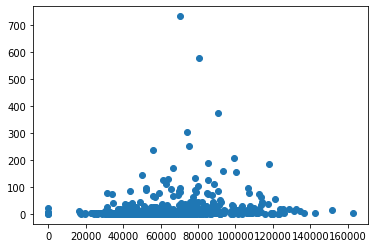

In [52]:
plt.scatter(combined_df['Mean'], combined_df['MRD'])

In [58]:
population_by_county = pd.read_excel(r'Resources\population_by_county.xlsx')
population_by_county

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geography.1,Geography.2,"Population Estimate - April 1, 2010 Estimates Base","Population Estimate - July 1, 2017","Change, 2010 to 2017 - Number","Change, 2010 to 2017 - Percent [1]","Rankings - Population Estimate - April 1, 2010 Estimates Base","Rankings - Population Estimate - July 1, 2017","Rankings - Change, 2010 to 2017 - Number","Rankings - Change, 2010 to 2017 - Percent"
0,0400000US01,1,Alabama,0400000US01,1,Alabama,Alabama,4780135,4874747,94612,2.0,(X),(X),(X),(X)
1,0400000US01,1,Alabama,0500000US01001,1001,Alabama - Autauga County,Autauga County,54571,55504,933,1.7,23,24,14,15
2,0400000US01,1,Alabama,0500000US01003,1003,Alabama - Baldwin County,Baldwin County,182265,212628,30363,16.7,7,6,1,1
3,0400000US01,1,Alabama,0500000US01005,1005,Alabama - Barbour County,Barbour County,27457,25270,-2187,-8.0,39,41,61,61
4,0400000US01,1,Alabama,0500000US01007,1007,Alabama - Bibb County,Bibb County,22919,22668,-251,-1.1,45,45,30,31
5,0400000US01,1,Alabama,0500000US01009,1009,Alabama - Blount County,Blount County,57324,58013,689,1.2,22,22,17,16
6,0400000US01,1,Alabama,0500000US01011,1011,Alabama - Bullock County,Bullock County,10911,10309,-602,-5.5,65,64,34,51
7,0400000US01,1,Alabama,0500000US01013,1013,Alabama - Butler County,Butler County,20946,19825,-1121,-5.4,49,48,52,50
8,0400000US01,1,Alabama,0500000US01015,1015,Alabama - Calhoun County,Calhoun County,118586,114728,-3858,-3.3,10,10,66,44
9,0400000US01,1,Alabama,0500000US01017,1017,Alabama - Chambers County,Chambers County,34170,33713,-457,-1.3,35,34,32,33
